In [1]:
import pandas_datareader as pdr
key="286edd6caa057b4b3eab875c4da228e4a1bf1e06"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-11-08 00:00:00+00:00,111.06,111.720,109.70,110.31,24254179,26.131551,26.286844,25.811554,25.955082,97016716,0.0,1.0
1,AAPL,2016-11-09 00:00:00+00:00,110.88,111.320,108.05,109.88,59176361,26.089199,26.192727,25.423322,25.853907,236705444,0.0,1.0
2,AAPL,2016-11-10 00:00:00+00:00,107.79,111.090,105.83,111.09,57134541,25.362146,26.138610,24.900973,26.138610,228538164,0.0,1.0
3,AAPL,2016-11-11 00:00:00+00:00,108.43,108.870,106.55,106.92,34143898,25.512733,25.616261,25.070384,25.157442,136575592,0.0,1.0
4,AAPL,2016-11-14 00:00:00+00:00,105.71,107.809,104.08,107.32,51175504,24.872738,25.366616,24.489212,25.251559,204702016,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-11-01 00:00:00+00:00,148.96,149.70,147.80,148.985,73396551,148.743688,149.482614,147.585373,148.768652,73396551,0.00,1.0
1254,AAPL,2021-11-02 00:00:00+00:00,150.02,151.57,148.65,148.660,68922374,149.802149,151.349898,148.434139,148.444124,68922374,0.00,1.0
1255,AAPL,2021-11-03 00:00:00+00:00,151.49,151.97,149.82,150.390,54511534,151.270015,151.749317,149.602440,150.171612,54511534,0.00,1.0
1256,AAPL,2021-11-04 00:00:00+00:00,150.96,152.43,150.64,151.580,60394616,150.740784,152.208650,150.421249,151.359884,60394616,0.00,1.0
1257,AAPL,2021-11-05 00:00:00+00:00,151.28,152.20,150.06,151.890,65463883,151.280000,152.200000,150.060000,151.890000,65463883,0.22,1.0


In [8]:
df_new=df.reset_index()['open']

In [9]:
df_new

0       110.310
1       109.880
2       111.090
3       106.920
4       107.320
         ...   
1253    148.985
1254    148.660
1255    150.390
1256    151.580
1257    151.890
Name: open, Length: 1258, dtype: float64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

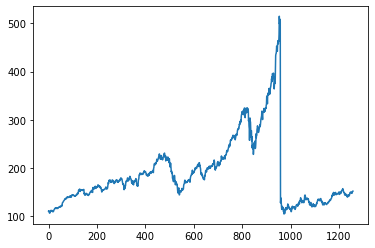

In [11]:
plt.plot(df_new)

In [12]:
import numpy as np

In [13]:
df_new

0       110.310
1       109.880
2       111.090
3       106.920
4       107.320
         ...   
1253    148.985
1254    148.660
1255    150.390
1256    151.580
1257    151.890
Name: open, Length: 1258, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
df_new=scaler.fit_transform(np.array(df_new).reshape(-1,1))

In [18]:
print(df_new)

[[0.01406459]
 [0.01301645]
 [0.01596587]
 ...
 [0.11176112]
 [0.11466179]
 [0.11541743]]


In [37]:
training_size=int(len(df_new)*0.65)
test_size=len(df_new)-training_size
train_data,test_data=df_new[0:training_size,:],df_new[training_size:len(df_new),:1]

In [38]:
training_size,test_size

(817, 441)

In [39]:
train_data

array([[0.01406459],
       [0.01301645],
       [0.01596587],
       [0.00580134],
       [0.00677636],
       [0.0049482 ],
       [0.00526508],
       [0.01284583],
       [0.01262645],
       [0.01360146],
       [0.01806216],
       [0.01662401],
       [0.01606338],
       [0.01679464],
       [0.01521024],
       [0.01711152],
       [0.01419866],
       [0.0112858 ],
       [0.01330896],
       [0.01209019],
       [0.01150518],
       [0.01540524],
       [0.01893967],
       [0.02132846],
       [0.0226691 ],
       [0.02559415],
       [0.02642291],
       [0.02907983],
       [0.02744668],
       [0.02973796],
       [0.02988422],
       [0.02878732],
       [0.0269348 ],
       [0.02920171],
       [0.03163924],
       [0.02903108],
       [0.02951859],
       [0.02744668],
       [0.02756856],
       [0.02773918],
       [0.02983547],
       [0.03268739],
       [0.03468617],
       [0.03461304],
       [0.03499086],
       [0.03551493],
       [0.03363803],
       [0.037

In [40]:
import numpy
# convert an array of values into matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [41]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [42]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [43]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [44]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [45]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [46]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=65,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 251ms/step - loss: 0.0115 - val_loss: 0.0238
Epoch 2/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0033 - val_loss: 0.0232
Epoch 3/100
12/12 [==============================] - 2s 163ms/step - loss: 0.0017 - val_loss: 0.0188
Epoch 4/100
12/12 [==============================] - 2s 164ms/step - loss: 5.7888e-04 - val_loss: 0.0216
Epoch 5/100
12/12 [==============================] - 2s 163ms/step - loss: 4.9299e-04 - val_loss: 0.0226
Epoch 6/100
12/12 [==============================] - 2s 164ms/step - loss: 4.5481e-04 - val_loss: 0.0220
Epoch 7/100
12/12 [==============================] - 2s 164ms/step - loss: 4.3822e-04 - val_loss: 0.0206
Epoch 8/100
12/12 [==============================] - 2s 163ms/step - loss: 4.4790e-04 - val_loss: 0.0215
Epoch 9/100
12/12 [==============================] - 2s 164ms/step - loss: 4.2448e-04 - val_loss: 0.0207
Epoch 10/100
12/12 [==============================] - 2s 165ms/step

12/12 [==============================] - 2s 169ms/step - loss: 1.8913e-04 - val_loss: 0.0078
Epoch 79/100
12/12 [==============================] - 2s 167ms/step - loss: 2.2434e-04 - val_loss: 0.0078
Epoch 80/100
12/12 [==============================] - 2s 164ms/step - loss: 2.5147e-04 - val_loss: 0.0082
Epoch 81/100
12/12 [==============================] - 2s 163ms/step - loss: 2.3635e-04 - val_loss: 0.0095
Epoch 82/100
12/12 [==============================] - 2s 164ms/step - loss: 2.4631e-04 - val_loss: 0.0080
Epoch 83/100
12/12 [==============================] - 2s 186ms/step - loss: 3.2734e-04 - val_loss: 0.0074
Epoch 84/100
12/12 [==============================] - 2s 163ms/step - loss: 2.4468e-04 - val_loss: 0.0084
Epoch 85/100
12/12 [==============================] - 2s 164ms/step - loss: 1.8241e-04 - val_loss: 0.0080
Epoch 86/100
12/12 [==============================] - 2s 164ms/step - loss: 1.6751e-04 - val_loss: 0.0086
Epoch 87/100
12/12 [==============================] - 2s 16

In [49]:
import tensorflow as tf

In [50]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [51]:
print(train_predict)

[[0.09680229]
 [0.09789928]
 [0.09888373]
 [0.09973969]
 [0.1003588 ]
 [0.1006997 ]
 [0.1006939 ]
 [0.10020209]
 [0.09935861]
 [0.09827801]
 [0.0971076 ]
 [0.09605434]
 [0.0951307 ]
 [0.09453882]
 [0.09446002]
 [0.09490553]
 [0.09581497]
 [0.09693068]
 [0.09807495]
 [0.09925927]
 [0.10076449]
 [0.10224772]
 [0.10363982]
 [0.10488749]
 [0.10626055]
 [0.10845194]
 [0.11135203]
 [0.11440632]
 [0.11752785]
 [0.12067156]
 [0.12361003]
 [0.12576991]
 [0.12663731]
 [0.12659   ]
 [0.12605673]
 [0.12545846]
 [0.12482061]
 [0.12417219]
 [0.12359472]
 [0.12303964]
 [0.1225971 ]
 [0.12217545]
 [0.12182549]
 [0.12168425]
 [0.1216951 ]
 [0.12197436]
 [0.1225201 ]
 [0.12323114]
 [0.12256986]
 [0.12058877]
 [0.11778767]
 [0.11409383]
 [0.10999259]
 [0.10597997]
 [0.10291729]
 [0.10087547]
 [0.09980671]
 [0.09944667]
 [0.09986488]
 [0.10058162]
 [0.10125448]
 [0.10177656]
 [0.10208807]
 [0.10227012]
 [0.10220523]
 [0.10182057]
 [0.10117193]
 [0.10055358]
 [0.10018829]
 [0.10028145]
 [0.10073943]
 [0.10

In [52]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [53]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.012247269090110178

In [54]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.08424540659782938

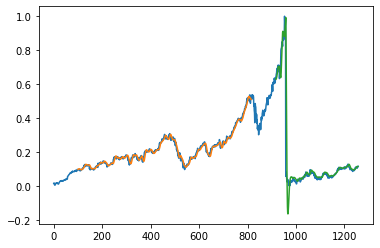

In [55]:
look_back=100
trainPredictPlot = numpy.empty_like(df_new)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_new)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_new)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_new))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [56]:
len(test_data)

441

In [57]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [58]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [59]:
temp_input

[0.06157221206581355,
 0.06379037172455822,
 0.06279098110907984,
 0.06725167580743448,
 0.07124923826934794,
 0.0729067641681901,
 0.07049360146252283,
 0.0703717245581962,
 0.07375990249847654,
 0.07709932967702617,
 0.07814747105423521,
 0.08131627056672759,
 0.08660572821450331,
 0.09505179768433883,
 0.09028641072516759,
 0.09313833028641073,
 0.10157221206581354,
 0.09625837903717246,
 0.10617915904936012,
 0.10895795246800735,
 0.10705667276051192,
 0.09557586837294332,
 0.09486898232784888,
 0.09991468616697138,
 0.10090188909201706,
 0.10483851310176726,
 0.10659354052407069,
 0.10866544789762342,
 0.0981596587446679,
 0.09785496648385131,
 0.09711151736745885,
 0.10193784277879345,
 0.10059719683120047,
 0.10415600243753811,
 0.10344911639244361,
 0.10191346739792809,
 0.10154783668494818,
 0.102132845825716,
 0.10118220597196834,
 0.10152346130408288,
 0.10829981718464352,
 0.10723948811700182,
 0.11137111517367457,
 0.11032297379646558,
 0.09869591712370504,
 0.104570383912

In [60]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11421426]
101
1 day input [0.06379037 0.06279098 0.06725168 0.07124924 0.07290676 0.0704936
 0.07037172 0.0737599  0.07709933 0.07814747 0.08131627 0.08660573
 0.0950518  0.09028641 0.09313833 0.10157221 0.09625838 0.10617916
 0.10895795 0.10705667 0.09557587 0.09486898 0.09991469 0.10090189
 0.10483851 0.10659354 0.10866545 0.09815966 0.09785497 0.09711152
 0.10193784 0.1005972  0.104156   0.10344912 0.10191347 0.10154784
 0.10213285 0.10118221 0.10152346 0.10829982 0.10723949 0.11137112
 0.11032297 0.09869592 0.10457038 0.10669104 0.10946984 0.11034735
 0.10678854 0.10466789 0.10837294 0.11729433 0.11770871 0.12024375
 0.11997562 0.12292505 0.1278245  0.12419257 0.12299817 0.11234613
 0.11166362 0.10730043 0.10700792 0.10793419 0.09569775 0.09601463
 0.09728215 0.10264473 0.10023157 0.09976843 0.0943571  0.09245582
 0.09535649 0.09106642 0.09072517 0.08519196 0.08514321 0.09389397
 0.09625838 0.09196831 0.09430835 0.08944546 0.09157831 0.09562462
 0.09483242 0.10352224 0.10764168 

10 day output [[0.1221051]]
11 day input [0.08131627 0.08660573 0.0950518  0.09028641 0.09313833 0.10157221
 0.09625838 0.10617916 0.10895795 0.10705667 0.09557587 0.09486898
 0.09991469 0.10090189 0.10483851 0.10659354 0.10866545 0.09815966
 0.09785497 0.09711152 0.10193784 0.1005972  0.104156   0.10344912
 0.10191347 0.10154784 0.10213285 0.10118221 0.10152346 0.10829982
 0.10723949 0.11137112 0.11032297 0.09869592 0.10457038 0.10669104
 0.10946984 0.11034735 0.10678854 0.10466789 0.10837294 0.11729433
 0.11770871 0.12024375 0.11997562 0.12292505 0.1278245  0.12419257
 0.12299817 0.11234613 0.11166362 0.10730043 0.10700792 0.10793419
 0.09569775 0.09601463 0.09728215 0.10264473 0.10023157 0.09976843
 0.0943571  0.09245582 0.09535649 0.09106642 0.09072517 0.08519196
 0.08514321 0.09389397 0.09625838 0.09196831 0.09430835 0.08944546
 0.09157831 0.09562462 0.09483242 0.10352224 0.10764168 0.10790981
 0.11005484 0.10759293 0.10917733 0.10925046 0.11037172 0.10402194
 0.10833638 0.1075441

18 day output [[0.12785833]]
19 day input [0.10895795 0.10705667 0.09557587 0.09486898 0.09991469 0.10090189
 0.10483851 0.10659354 0.10866545 0.09815966 0.09785497 0.09711152
 0.10193784 0.1005972  0.104156   0.10344912 0.10191347 0.10154784
 0.10213285 0.10118221 0.10152346 0.10829982 0.10723949 0.11137112
 0.11032297 0.09869592 0.10457038 0.10669104 0.10946984 0.11034735
 0.10678854 0.10466789 0.10837294 0.11729433 0.11770871 0.12024375
 0.11997562 0.12292505 0.1278245  0.12419257 0.12299817 0.11234613
 0.11166362 0.10730043 0.10700792 0.10793419 0.09569775 0.09601463
 0.09728215 0.10264473 0.10023157 0.09976843 0.0943571  0.09245582
 0.09535649 0.09106642 0.09072517 0.08519196 0.08514321 0.09389397
 0.09625838 0.09196831 0.09430835 0.08944546 0.09157831 0.09562462
 0.09483242 0.10352224 0.10764168 0.10790981 0.11005484 0.10759293
 0.10917733 0.10925046 0.11037172 0.10402194 0.10833638 0.10754418
 0.11176112 0.11466179 0.11541743 0.11421426 0.11490688 0.11571027
 0.11654937 0.117387

28 day output [[0.13417797]]
29 day input [0.09785497 0.09711152 0.10193784 0.1005972  0.104156   0.10344912
 0.10191347 0.10154784 0.10213285 0.10118221 0.10152346 0.10829982
 0.10723949 0.11137112 0.11032297 0.09869592 0.10457038 0.10669104
 0.10946984 0.11034735 0.10678854 0.10466789 0.10837294 0.11729433
 0.11770871 0.12024375 0.11997562 0.12292505 0.1278245  0.12419257
 0.12299817 0.11234613 0.11166362 0.10730043 0.10700792 0.10793419
 0.09569775 0.09601463 0.09728215 0.10264473 0.10023157 0.09976843
 0.0943571  0.09245582 0.09535649 0.09106642 0.09072517 0.08519196
 0.08514321 0.09389397 0.09625838 0.09196831 0.09430835 0.08944546
 0.09157831 0.09562462 0.09483242 0.10352224 0.10764168 0.10790981
 0.11005484 0.10759293 0.10917733 0.10925046 0.11037172 0.10402194
 0.10833638 0.10754418 0.11176112 0.11466179 0.11541743 0.11421426
 0.11490688 0.11571027 0.11654937 0.11738708 0.11820941 0.11901403
 0.11980326 0.12058008 0.12134689 0.1221051  0.12285515 0.12359703
 0.12433041 0.125054

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [62]:
len(df_new)

1258

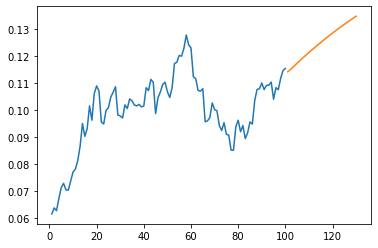

In [63]:
plt.plot(day_new,scaler.inverse_transform(df_new[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

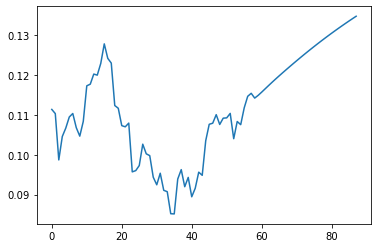

In [64]:
df2=df_new.tolist()
df2.extend(lst_output)
plt.plot(df2[1200:])

In [65]:
df2=scaler.inverse_transform(df2).tolist()

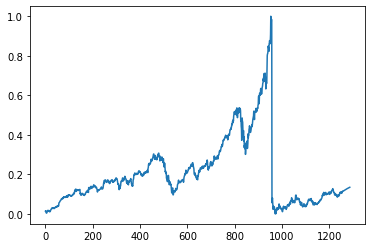

In [66]:
plt.plot(df2)